In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
import re
from collections import deque
import datetime
from wordcloud import WordCloud
import math
import statsmodels.api as sm
import statsmodels.formula.api as smf

## 1. 파일호출

In [3]:
# 파일 불러오기
with open('../../data/df_wl.pkl', 'rb') as f:
    df_wl = pickle.load(f)


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x105100ee0>>
Traceback (most recent call last):
  File "/Users/cslab/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py", line 770, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


In [2]:
# 파일 불러오기
with open('../../data/df_bodyconcat_wl.pkl', 'rb') as f:
    df_bodyconcat_wl = pickle.load(f)


In [3]:
df_bodyconcat_wl.shape

(1629546, 4)

In [3]:
df_wl['wl_list'] = df_wl['over4'].apply(lambda x : [len(w) for w in x])

In [4]:
df_bodyconcat_wl['wl_list'] = df_bodyconcat_wl['over4'].apply(lambda x : [len(w) for w in x])

In [36]:
df_wl['wl_6'] = df_wl['over4'].apply(lambda x : [w for w in x if len(w) ==6])
df_wl['over6'] = df_wl['over4'].apply(lambda x : [w for w in x if len(w) >=6])
df_wl['over7'] = df_wl['over4'].apply(lambda x : [w for w in x if len(w) >=7])
df_wl['over8'] = df_wl['over4'].apply(lambda x : [w for w in x if len(w) >=8])


/var/folders/lk/t243gzpx379bzd9mvx8dcsmm0000gp/T/ipykernel_91469/207577571.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wl['wl_6'] = df_wl['over4'].apply(lambda x : [w for w in x if len(w) ==6])
/var/folders/lk/t243gzpx379bzd9mvx8dcsmm0000gp/T/ipykernel_91469/207577571.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wl['over6'] = df_wl['over4'].apply(lambda x : [w for w in x if len(w) >=6])
/var/folders/lk/t243gzpx379bzd9mvx8dcsmm0000gp/T/ipykernel_91469/207577571.py:3: SettingWithCopyWarni

In [5]:
df_bodyconcat_wl['over6'] = df_bodyconcat_wl['over4'].apply(lambda x : [w for w in x if len(w) >=6])
df_bodyconcat_wl['over7'] = df_bodyconcat_wl['over4'].apply(lambda x : [w for w in x if len(w) >=7])
df_bodyconcat_wl['over8'] = df_bodyconcat_wl['over4'].apply(lambda x : [w for w in x if len(w) >=8])


In [6]:
arr6 = [] 
arr7 = [] 
arr8 = [] 
[arr6.extend(x) for x in df_wl['over6']]
[arr7.extend(x) for x in df_wl['over7']]
[arr8.extend(x) for x in df_wl['over8']]

NameError: name 'df_wl' is not defined

In [38]:
arr6_str = ' '.join(arr6)
arr7_str = ' '.join(arr7)
arr8_str = ' '.join(arr8)

In [39]:
wc6 = WordCloud(background_color='white', width= 800, height = 600, max_words = 200)
cloud6 = wc6.generate(arr6_str)

In [40]:
wc7 = WordCloud(background_color='white', width= 800, height = 600, max_words = 200)
cloud7 = wc7.generate(arr7_str)

In [41]:
wc8 = WordCloud(background_color='white', width= 800, height = 600, max_words = 200)
cloud8 = wc8.generate(arr8_str)

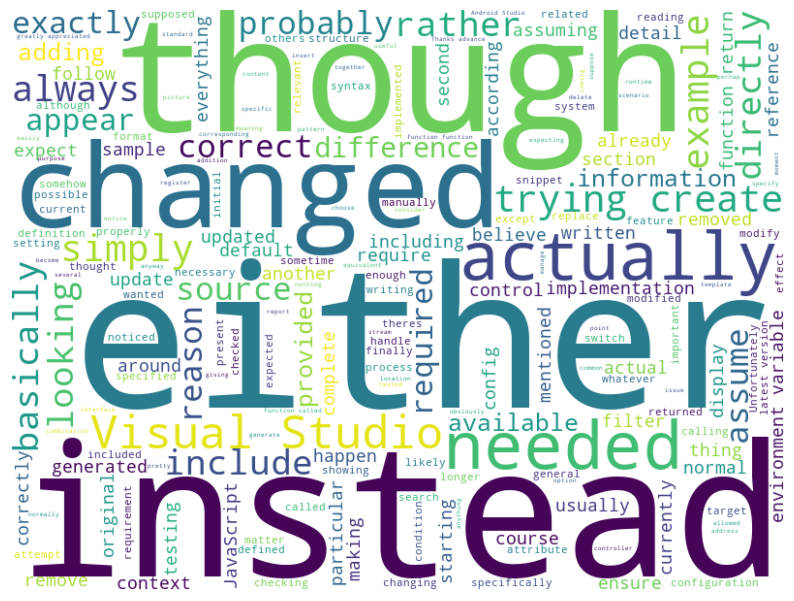

In [35]:
plt.figure(figsize = (10,10))
plt.axis('off')
plt.imshow(cloud6, interpolation='bilinear')

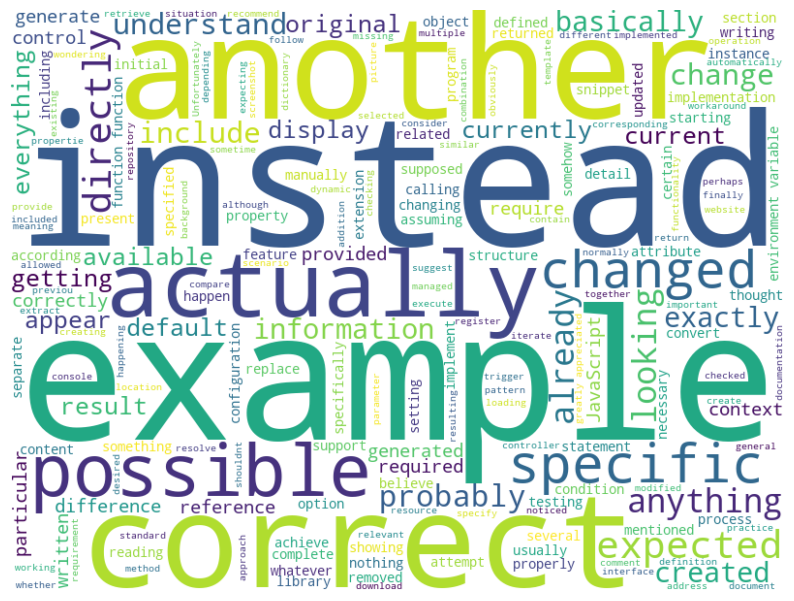

In [42]:
plt.figure(figsize = (10,10))
plt.axis('off')
plt.imshow(cloud7, interpolation='bilinear')

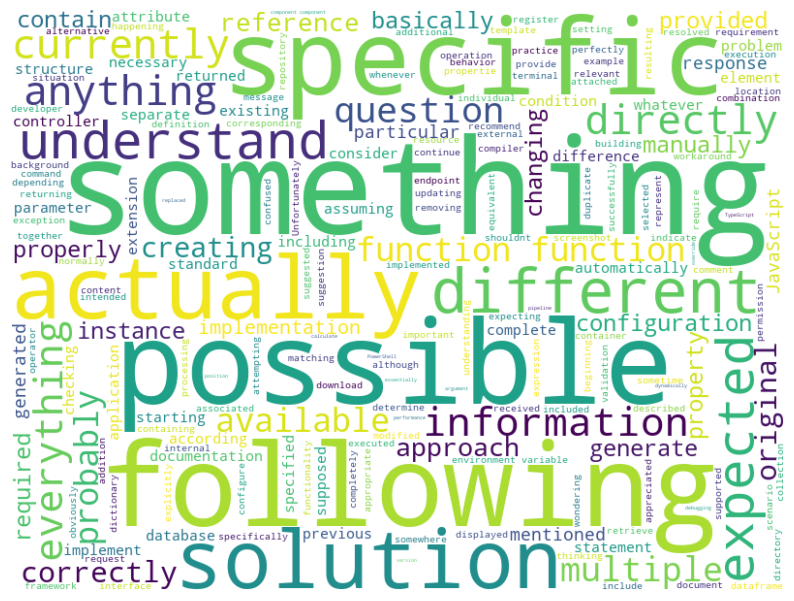

In [43]:
plt.figure(figsize = (10,10))
plt.axis('off')
plt.imshow(cloud8, interpolation='bilinear')

In [32]:
wordcloud = WordCloud().generate(arr_str)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plt.imshow(wordcloud)   # wordcloud 객체를 넣으면 워드클라우드 형태의 그래프 생성
plt.axis('off')  #눈금 삭제 
plt.show()

In [46]:
df_bodyconcat_wl.loc[df_bodyconcat_wl.year ==2023, 'over6']

0           [machines, instructs, Xdebug, connect, address...
4           [ASPNET, Identity, themselves, followed, artic...
5                                 [commented, jarmod, values]
6           [further, investigation, logging, confirm, quo...
7           [currently, configuration, Winston, loggerWhic...
                                  ...                        
43414027    [quotfancyquot, quotes, library, doesnt, Javas...
43415781    [comments, commands, nextflow, process, exampl...
43415782    [restarting, windows, desktop, though, differe...
43415783    [trying, implement, producer, consumer, proble...
43415784    [trying, perplexity, nothing, charts, except, ...
Name: over6, Length: 133744, dtype: object

In [7]:
df_bodyconcat_wl['year'] = df_bodyconcat_wl['creationdate'].dt.year

In [8]:
arr6_2018 = [] 
arr6_2019 = [] 
arr6_2020 = [] 
arr6_2021 = [] 
arr6_2022 = [] 
arr6_2023 = [] 

[arr6_2023.extend(x) for x in df_bodyconcat_wl.loc[df_bodyconcat_wl.year ==2023, 'over6']]
[arr6_2022.extend(x) for x in df_bodyconcat_wl.loc[df_bodyconcat_wl.year ==2022, 'over6']]
[arr6_2021.extend(x) for x in df_bodyconcat_wl.loc[df_bodyconcat_wl.year ==2021, 'over6']]
[arr6_2020.extend(x) for x in df_bodyconcat_wl.loc[df_bodyconcat_wl.year ==2020, 'over6']]
[arr6_2019.extend(x) for x in df_bodyconcat_wl.loc[df_bodyconcat_wl.year ==2019, 'over6']]
[arr6_2018.extend(x) for x in df_bodyconcat_wl.loc[df_bodyconcat_wl.year ==2018, 'over6']]

arr6_2018_str = ' '.join(arr6_2018)
arr6_2019_str = ' '.join(arr6_2019)
arr6_2020_str = ' '.join(arr6_2020)
arr6_2021_str = ' '.join(arr6_2021)
arr6_2022_str = ' '.join(arr6_2022)
arr6_2023_str = ' '.join(arr6_2023)



In [18]:
arr7_2018 = [] 
arr7_2019 = [] 
arr7_2020 = [] 
arr7_2021 = [] 
arr7_2022 = [] 
arr7_2023 = [] 

[arr7_2023.extend(x) for x in df_bodyconcat_wl.loc[df_bodyconcat_wl.year ==2023, 'over7']]
[arr7_2022.extend(x) for x in df_bodyconcat_wl.loc[df_bodyconcat_wl.year ==2022, 'over7']]
[arr7_2021.extend(x) for x in df_bodyconcat_wl.loc[df_bodyconcat_wl.year ==2021, 'over7']]
[arr7_2020.extend(x) for x in df_bodyconcat_wl.loc[df_bodyconcat_wl.year ==2020, 'over7']]
[arr7_2019.extend(x) for x in df_bodyconcat_wl.loc[df_bodyconcat_wl.year ==2019, 'over7']]
[arr7_2018.extend(x) for x in df_bodyconcat_wl.loc[df_bodyconcat_wl.year ==2018, 'over7']]

arr7_2018_str = ' '.join(arr7_2018)
arr7_2019_str = ' '.join(arr7_2019)
arr7_2020_str = ' '.join(arr7_2020)
arr7_2021_str = ' '.join(arr7_2021)
arr7_2022_str = ' '.join(arr7_2022)
arr7_2023_str = ' '.join(arr7_2023)



In [21]:
arr8_2018 = [] 
arr8_2019 = [] 
arr8_2020 = [] 
arr8_2021 = [] 
arr8_2022 = [] 
arr8_2023 = [] 

[arr8_2023.extend(x) for x in df_bodyconcat_wl.loc[df_bodyconcat_wl.year ==2023, 'over8']]
[arr8_2022.extend(x) for x in df_bodyconcat_wl.loc[df_bodyconcat_wl.year ==2022, 'over8']]
[arr8_2021.extend(x) for x in df_bodyconcat_wl.loc[df_bodyconcat_wl.year ==2021, 'over8']]
[arr8_2020.extend(x) for x in df_bodyconcat_wl.loc[df_bodyconcat_wl.year ==2020, 'over8']]
[arr8_2019.extend(x) for x in df_bodyconcat_wl.loc[df_bodyconcat_wl.year ==2019, 'over8']]
[arr8_2018.extend(x) for x in df_bodyconcat_wl.loc[df_bodyconcat_wl.year ==2018, 'over8']]

arr8_2018_str = ' '.join(arr8_2018)
arr8_2019_str = ' '.join(arr8_2019)
arr8_2020_str = ' '.join(arr8_2020)
arr8_2021_str = ' '.join(arr8_2021)
arr8_2022_str = ' '.join(arr8_2022)
arr8_2023_str = ' '.join(arr8_2023)



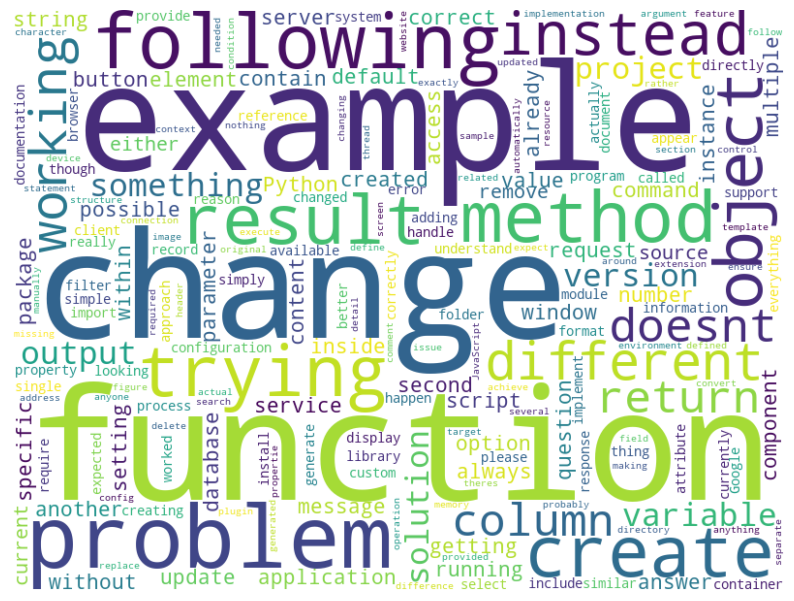

In [49]:
wc6_2023 = WordCloud(background_color='white', width= 800, height = 600, max_words = 200)
cloud6_2023 = wc6_2023.generate(arr6_2023_str)

plt.figure(figsize = (10,10))
plt.axis('off')
plt.imshow(cloud6_2023, interpolation='bilinear')

In [50]:
wc6_2022 = WordCloud(background_color='white', width= 800, height = 600, max_words = 200)
cloud6_2022 = wc6_2022.generate(arr6_2022_str)

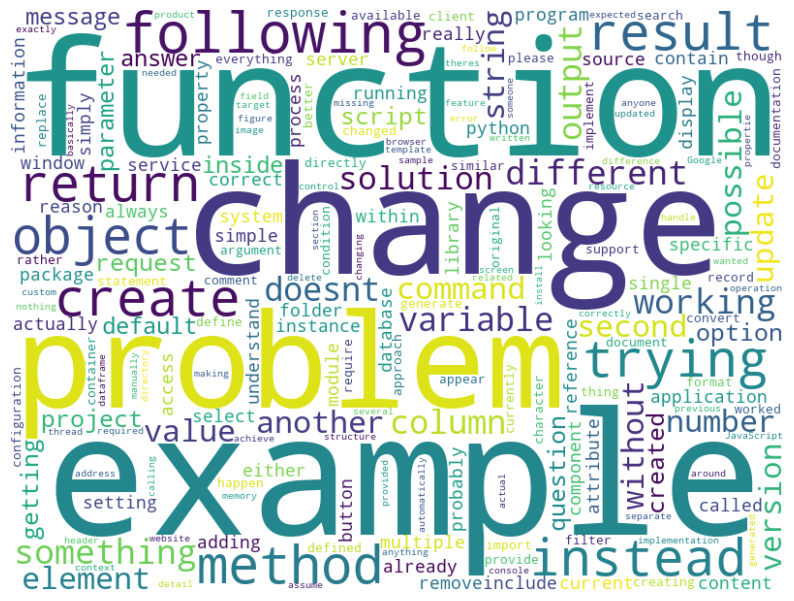

In [52]:
plt.figure(figsize = (10,10))
plt.axis('off')
plt.imshow(cloud6_2022, interpolation='bilinear')

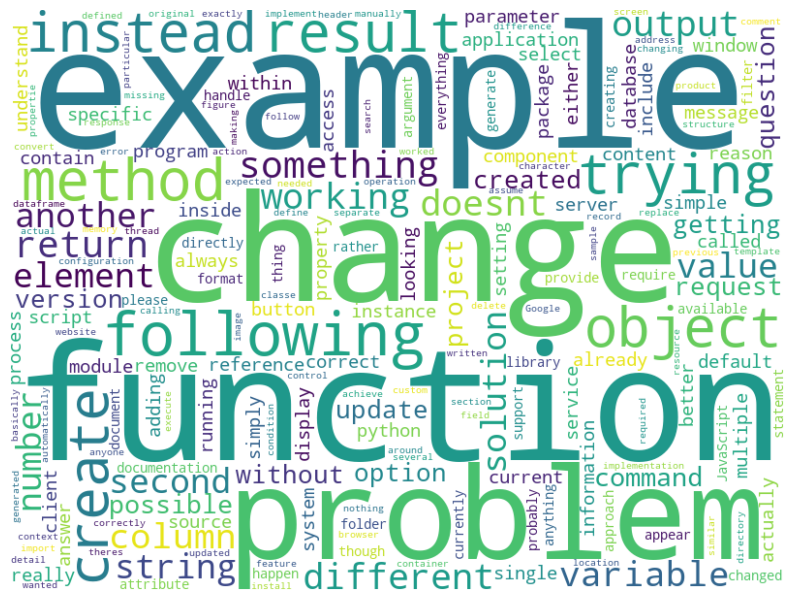

In [53]:
wc6_2021 = WordCloud(background_color='white', width= 800, height = 600, max_words = 200)
cloud6_2021 = wc6_2021.generate(arr6_2021_str)

plt.figure(figsize = (10,10))
plt.axis('off')
plt.imshow(cloud6_2021, interpolation='bilinear')

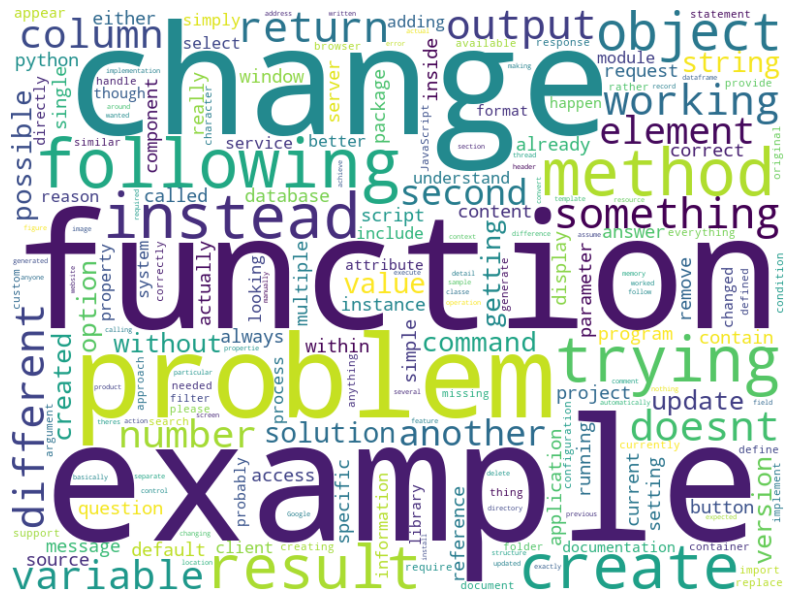

In [21]:
wc6_2020 = WordCloud(background_color='white', width= 800, height = 600, max_words = 200)
cloud6_2020 = wc6_2020.generate(arr6_2020_str)

plt.figure(figsize = (10,10))
plt.axis('off')
plt.imshow(cloud6_2020, interpolation='bilinear')

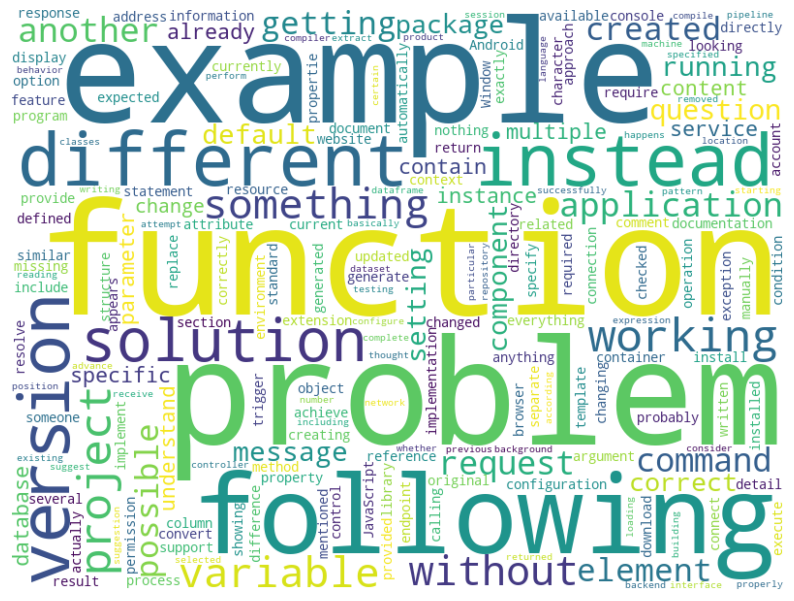

In [19]:
wc7_2023 = WordCloud(background_color='white', width= 800, height = 600, max_words = 200)
cloud7_2023 = wc7_2023.generate(arr7_2023_str)

plt.figure(figsize = (10,10))
plt.axis('off')
plt.imshow(cloud7_2023, interpolation='bilinear')

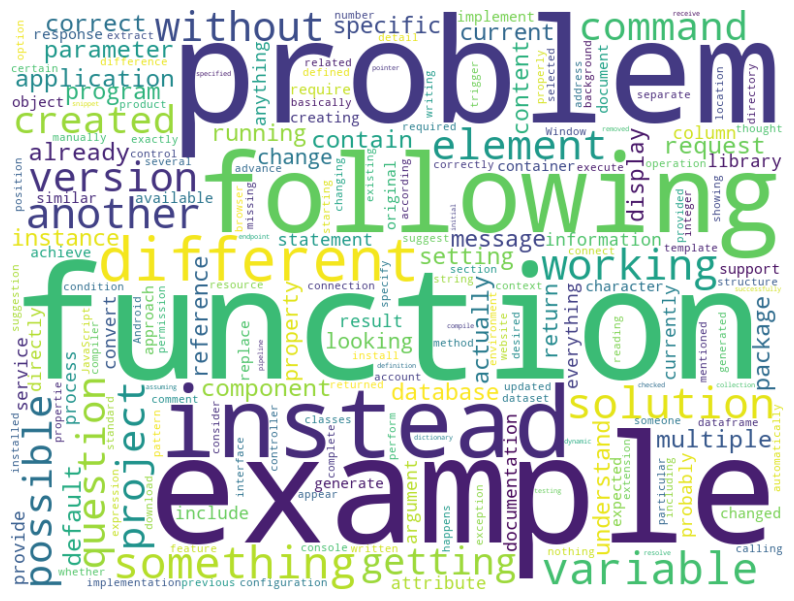

In [20]:
wc7_2022 = WordCloud(background_color='white', width= 800, height = 600, max_words = 200)
cloud7_2022 = wc7_2022.generate(arr7_2022_str)

plt.figure(figsize = (10,10))
plt.axis('off')
plt.imshow(cloud7_2022, interpolation='bilinear')

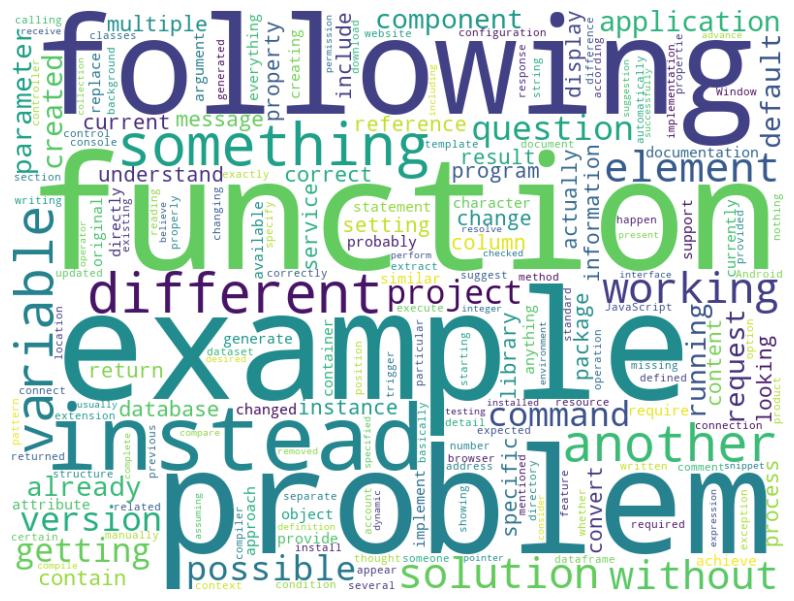

In [22]:
wc7_2021 = WordCloud(background_color='white', width= 800, height = 600, max_words = 200)
cloud7_2021 = wc7_2021.generate(arr7_2021_str)

plt.figure(figsize = (10,10))
plt.axis('off')
plt.imshow(cloud7_2021, interpolation='bilinear')

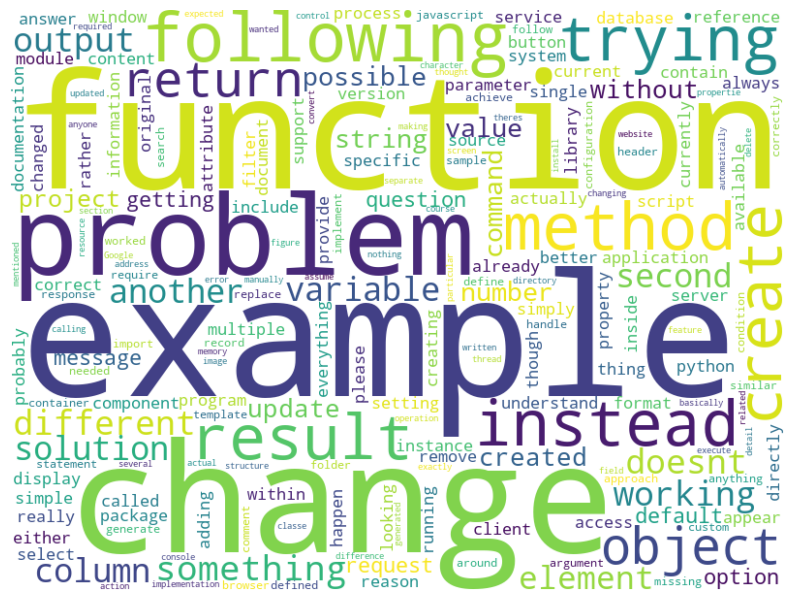

In [ ]:
wc8_2023 = WordCloud(background_color='white', width= 800, height = 600, max_words = 200)
cloud8_2023 = wc8_2023.generate(arr8_2023_str)

plt.figure(figsize = (10,10))
plt.axis('off')
plt.imshow(cloud8_2023, interpolation='bilinear')

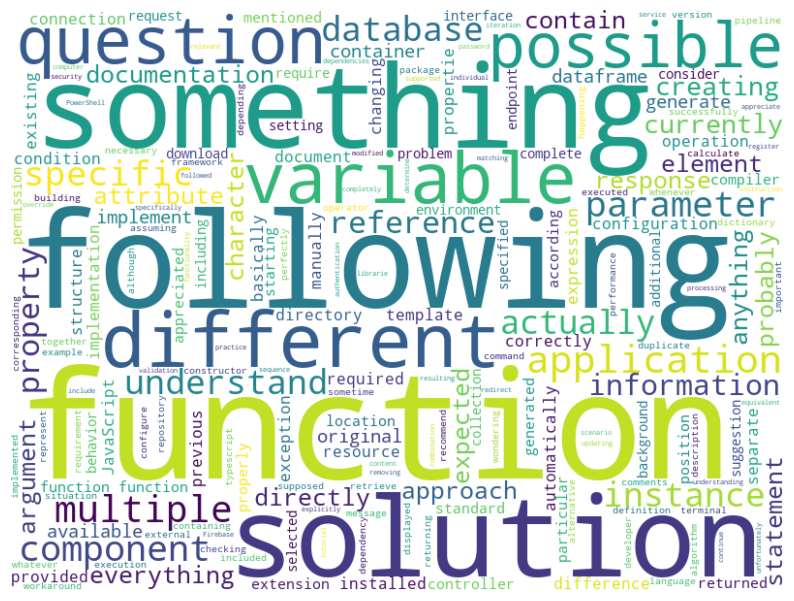

In [23]:
wc8_2022 = WordCloud(background_color='white', width= 800, height = 600, max_words = 200)
cloud8_2022 = wc8_2022.generate(arr8_2022_str)

plt.figure(figsize = (10,10))
plt.axis('off')
plt.imshow(cloud8_2022, interpolation='bilinear')

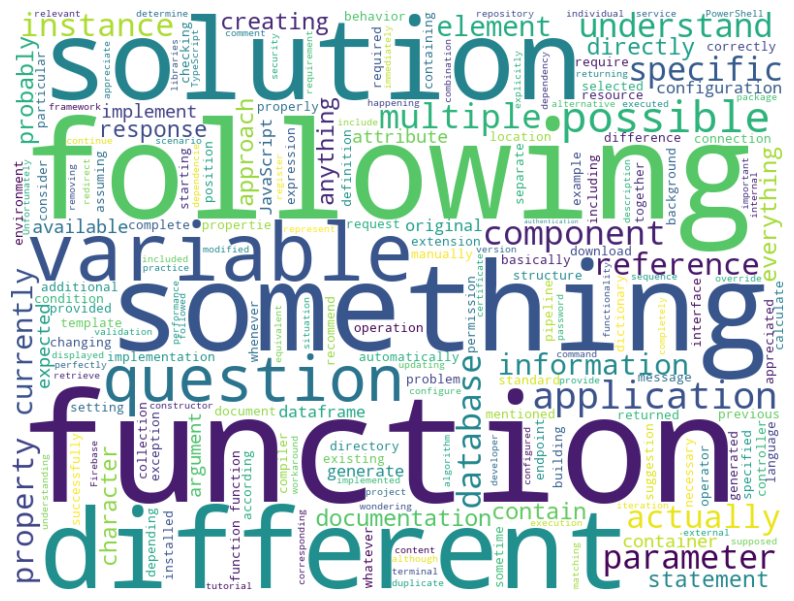

In [25]:
wc8_2021 = WordCloud(background_color='white', width= 800, height = 600, max_words = 200)
cloud8_2021 = wc8_2021.generate(arr8_2021_str)

plt.figure(figsize = (10,10))
plt.axis('off')
plt.imshow(cloud8_2021, interpolation='bilinear')